<a href="https://colab.research.google.com/github/roxcalan/SDP-assingments/blob/main/assingment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
img = list(zip(digits.images , digits.target))

In [8]:
img[100]

(array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
        [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
        [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
        [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
        [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
        [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]]),
 4)

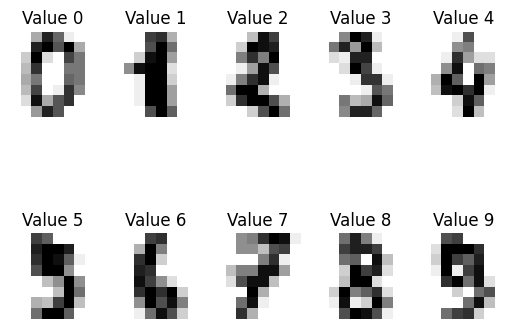

In [10]:
for i , (image,label) in enumerate(img[:10]):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Value %i' % label)

In [11]:
X_train , X_test , Y_train , Y_test = train_test_split(digits.data , digits.target , test_size = 0.3 , random_state = 2018)

In [12]:
sc = StandardScaler()

In [13]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
svm_clf = SVC(kernel='rbf' , gamma = 0.001 , C = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy' , random_state = 2018)
ada = AdaBoostClassifier(base_estimator = dt , n_estimators = 1000 , learning_rate = 0.1 , random_state = 2018)
mlp = MLPClassifier(activation = 'logistic' , solver = 'sgd' , learning_rate_init = 0.001 , learning_rate = 'constant' , alpha = 1e-4 , hidden_layer_sizes = (100,) , max_iter = 5000 , shuffle = True , random_state = 2018 )

In [15]:
svm_clf.fit(X_train_std , Y_train)
knn_clf.fit(X_train_std , Y_train)
ada.fit(X_train_std , Y_train)
mlp.fit(X_train_std , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


MLPClassifier(activation='logistic', max_iter=5000, random_state=2018,
              solver='sgd')

In [16]:
svm_pred = svm_clf.predict(X_test_std)
knn_pred = knn_clf.predict(X_test_std)
ada_pred = ada.predict(X_test_std)
mlp_pred = mlp.predict(X_test_std)

In [17]:
print("Accuracy Score SVM" , accuracy_score(Y_test , svm_pred))
print("Accuracy Score KNN" , accuracy_score(Y_test , knn_pred))
print("Accuracy Score AdaBoost" , accuracy_score(Y_test , ada_pred))
print("Accuracy Score MLP" , accuracy_score(Y_test , mlp_pred))

Accuracy Score SVM 0.9425925925925925
Accuracy Score KNN 0.975925925925926
Accuracy Score AdaBoost 0.937037037037037
Accuracy Score MLP 0.95


In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
knn1 = KNeighborsClassifier()

In [20]:
clf_knn1 = GridSearchCV(knn1 , {'n_neighbors':[i for i in range(1,100)]})

In [21]:
clf_knn1.fit(X_train_std , Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [22]:
print(clf_knn1.best_params_)

{'n_neighbors': 3}


In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

In [24]:
pipe_knn = Pipeline([['sc', StandardScaler()], ['knn_clf' , knn_clf]])

In [25]:
pipe_svm = Pipeline([['sc', StandardScaler()], ['svm_clf' , svm_clf]])

In [26]:
mv = VotingClassifier(estimators = [('ada',ada),('knn',pipe_knn),('svm' , pipe_svm)] , voting = 'hard')

In [27]:
mv.fit(X_train_std , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       max_depth=3,
                                                                                       random_state=2018),
                                                 learning_rate=0.1,
                                                 n_estimators=1000,
                                                 random_state=2018)),
                             ('knn',
                              Pipeline(steps=[['sc', StandardScaler()],
                                              ['knn_clf',
                                               KNeighborsClassifier(n_neighbors=3)]])),
                             ('svm',
                              Pipeline(steps=[['sc', StandardScaler()],
                                              ['svm_clf',
                                               SVC(C=1, gamma=0.001)]]))])

In [28]:
mv_pred = mv.predict(X_test_std)


In [29]:
print("Accuracy Score Majority Voting" , accuracy_score(Y_test , mv_pred))

Accuracy Score Majority Voting 0.9703703703703703


In [30]:
pipe_mlp = Pipeline([['sc', StandardScaler()], ['mlp' , mlp]])

In [31]:
mv1 = VotingClassifier(estimators = [('ada',ada),('knn',pipe_knn),('svm' , pipe_svm),('mlp' , pipe_mlp)] , voting = 'hard')

In [32]:
mv1.fit(X_train_std , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                       max_depth=3,
                                                                                       random_state=2018),
                                                 learning_rate=0.1,
                                                 n_estimators=1000,
                                                 random_state=2018)),
                             ('knn',
                              Pipeline(steps=[['sc', StandardScaler()],
                                              ['knn_clf',
                                               KNeighborsClassifier(n_neighbors=3)]])),
                             ('svm',
                              Pipeline(steps=[['sc', StandardScaler()],
                                              ['svm_clf',
                                               SVC(C=1, gamma=0.001)]])),
                             ('mlp',
                              Pipeline(steps=[['sc', StandardScaler()],
                                              ['mlp',
                                               MLPClassifier(activation='logistic',
                                                             max_iter=5000,
                                                             random_state=2018,
                                                             solver='sgd')]]))])

In [33]:
mv1_pred = mv1.predict(X_test_std)

In [34]:
print("Accuracy Score Majority Voting including MLP" , accuracy_score(Y_test , mv1_pred))

Accuracy Score Majority Voting including MLP 0.9666666666666667


In [36]:
!pip install Pillow


In [38]:
from PIL import Image


from PIL import Image
import numpy as np
from sklearn import datasets

# Load the image
img = Image.open('/content/WhatsApp Image 2024-05-07 at 12.38.13 PM.jpeg')

# Resize the image
img = img.resize((8, 8))

# Convert the image to grayscale
img = img.convert('L')

# Load the digits dataset
digits = datasets.load_digits()

# Convert the PIL Image object to a NumPy array
img = np.array(img)

# Convert the image to the same data type as the digits images
img = img.astype(digits.images.dtype)

# Flatten the image array
arr = []
for eachRow in img:
    for eachPixel in eachRow:
        arr.append(eachPixel)

# Predict the digit
print("Prediction is:")
print(knn_clf.predict([arr]))


Prediction is:
[1]
